In [1]:
import pandas as pd


#read and parse the .csv features file for A1-turbine normalized data
df = pd.read_csv('Normalized Data/A1-turbine_normalized.txt', delimiter = '\t')
df.head()

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,0.8462,0.8212,0.8488,0.0833,0.1500
1,0.9487,0.9226,0.9468,0.0833,0.1627
2,0.2821,0.2803,0.2764,0.5833,0.3712
3,0.2051,0.2042,0.2028,0.5833,0.3304
4,1.0000,0.9614,0.9413,0.8333,0.8948


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   #height_over_sea_level            451 non-null    float64
 1   fall                              451 non-null    float64
 2   net_fall                          451 non-null    float64
 3   flow                              451 non-null    float64
 4   power_of_hydroelectrical_turbine  451 non-null    float64
dtypes: float64(5)
memory usage: 17.7 KB


In [3]:
df.describe()

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
count,451.000000,451.000000,451.000000,451.000000,451.000000
mean,0.535221,0.516427,0.523289,0.486881,0.392635
std,0.284318,0.272583,0.271364,0.297155,0.250617
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.307700,0.306350,0.302450,0.250000,0.185400
50%,0.538500,0.508600,0.521500,0.500000,0.360500
75%,0.794900,0.757850,0.760800,0.750000,0.577500
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
columns = df.shape[1]

# construct an array of arrays size (451, 4) for all features input values
inputcolumns = df.columns[0 : 4]
features = df[inputcolumns].values

# construct an array of size (451) for all features target values
outputcolumn = df.columns[4]
targets = df[outputcolumn].values

print(features.shape)
print(targets.shape)

(451, 4)
(451,)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.15, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(383, 4)
(68, 4)
(383,)
(68,)


In [13]:
import MyNeuralNetwork as NeuralNetwork
import activation_functions as activation

# layers include input layer + hidden layers + output layer
layers = [4, 9, 5, 1]
nn = NeuralNetwork.MyNeuralNetwork(layers,  1000, 0.01, 0.9, activation.sigmoid, 0.2)

# initialize weights with random values
nn.initialize_weights()

# call fit function with features (n_samples,n_features) and targets (n_samples)
nn.fit(x_train, y_train)

print("L = ", nn.L, end="\n")
print("n = ", nn.n, end="\n")

print("xi = ", nn.xi, end="\n")
print("xi[0] = ", nn.xi[0], end="\n")
print("xi[1] = ", nn.xi[1], end="\n")

print("w = ", nn.w, end="\n")
print("w[1] = ", nn.w[1], end="\n")

print(nn.training_error)
print(nn.validation_error)

L =  4
n =  [4, 9, 5, 1]
xi =  [array([0.1282, 0.1319, 0.1477, 0.3333]), array([2.22654805e-09, 4.71349417e-06, 6.79742072e-07, 8.09292346e-07,
       2.90627261e-07, 1.49008402e-08, 1.08860454e-07, 1.83303055e-07,
       1.08829926e-09]), array([5.42813065e-05, 5.51993116e-04, 8.78199730e-07, 2.13971471e-03,
       1.53581638e-05]), array([0.99999793])]
xi[0] =  [0.1282 0.1319 0.1477 0.3333]
xi[1] =  [2.22654805e-09 4.71349417e-06 6.79742072e-07 8.09292346e-07
 2.90627261e-07 1.49008402e-08 1.08860454e-07 1.83303055e-07
 1.08829926e-09]
w =  [array([[0.1716824]]), array([[16.23799002, 15.78424509, 15.62891213,  8.8838377 ],
       [ 9.19453916,  9.02667675,  9.40063262,  6.62735609],
       [10.70040218, 10.71558454, 11.20882848,  6.21568968],
       [10.5320744 , 10.3174143 , 11.29019571,  6.91843042],
       [11.6244114 , 11.37966421, 11.76155026,  5.89040433],
       [14.2770149 , 14.23269435, 14.54220727,  8.75573479],
       [13.02849277, 12.19701925, 12.22249571,  6.43100212],
 

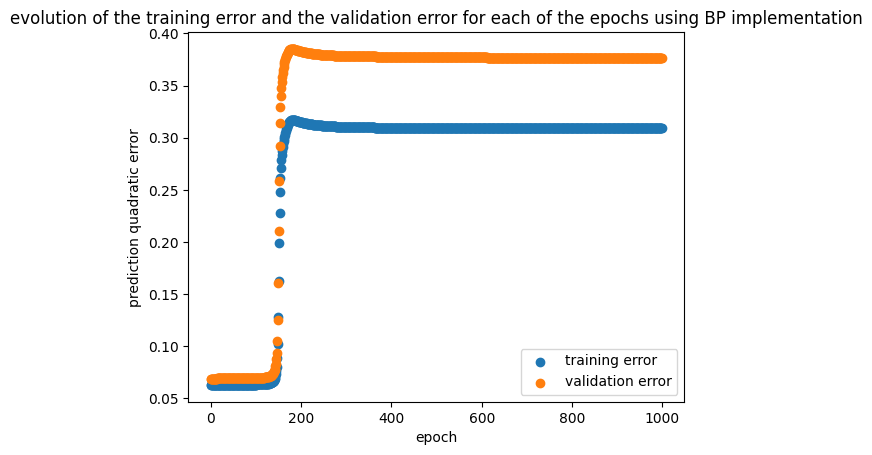

In [15]:
import matplotlib.pyplot as plt

# Extract the x and y coordinates from the arrays
x1 = nn.training_error[:, 0]
y1 = nn.training_error[:, 1]

x2 = nn.validation_error[:, 0]
y2 = nn.validation_error[:, 1]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first instance with a legend
ax.scatter(x1, y1, label='training error')

# Plot the second instance with a legend
ax.scatter(x2, y2, label='validation error')

# Add labels and title
ax.set_xlabel('epoch')
ax.set_ylabel('prediction quadratic error')
ax.set_title('evolution of the training error and the validation error for each of the epochs using BP implementation')

# Add a legend
ax.legend()

# Display the plot
plt.show()